Q2)
<ol>
    <li>Collect 100 social media comments ((Facebook / Twitter) written in Singlish or Tanglish related to Sri Lankan Politics Domain.</li>
    <li>Annotate each comment as a “positive” or “negative”</li>
    <li>Generate a Bi-gram language model using the annotated corpus to automatically classify a given social media comment related to Sri Lankan Politics domain as a “positive” or “negative”</li>                                           
</ol>


As the first step for sentiment analysis of social network’s comments, dataset needed to be annotated as ‘Positive’ or ‘Negative’. I had collected data from social media mainly from Facebook. Then I had manually annotated the dataset by adding a column as the label ‘Positive’ and ‘Negative’.



### 1.0 Importing All the relevant libraries

In [1]:
#importing relevant libraries

import pandas as pd
import spacy
import string

### 2.0 Read the comments dataset and writing dataset_train.csv and dataset_test.csv seperately after random sampling

Then I had sampled the total dataset to train and test portions using sample() function and those csv files were written to the file system.

<pre>

df = pd.read_csv("dataset.csv",header=None,names=['comment','label'],encoding="utf-8")
df_train=df.sample(frac=0.8,random_state=1)
df_test = df.drop(df_train.index)

df_train.to_csv("dataset_train.csv")
df_test.to_csv("dataset_test.csv")
</pre>

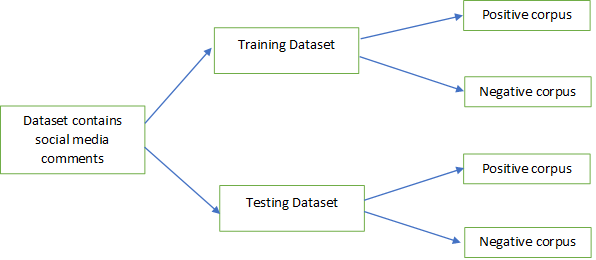

### 3.0 Writing seperate functions to following steps

<ul>
    <li>Training Comments</li>
    <ul>
        <li>3.1 Sentence tokenizing</li>
        <li>3.2 Cleaning text</li>
        <li>3.3 Bigram tokenzing in training dataset</li>
        <li>3.4 Finding frequencies of unigrams</li>
        <li>3.5 Finding frequencies of bigrams</li>
    </ul>
    <li>Testing Comments</li>
    <ul>
        <li>3.6 Geting bigram list of test comments by bigram tokenizing</li>
        <li>3.7 Calculate bigram probability of the comment from the positive documents</li>
        <li>3.8 Calculate bigram probability of the comment from the negative documents</li>
    </ul>    
</ul>

#### 3.1 Sentence tokenizing

In [2]:
def sent_tokenize(full_comment):
    """
    param: full comment as a string
    return: list of string sentences available in the comment
    """
    sent_list = []
    nlp = spacy.load("en_core_web_lg")
    doc = nlp(full_comment)
    for i in doc.sents:
        sent_list.append(str(i))
    return sent_list

#### 3.2 Cleaning text and Add start and end tags to identify  sentence borders

In [3]:
def clean_each_text(sents_list_by_comment):
    """
    param: a list which consists available sentences for a comment. 
    return: a list which contain cleaned sentences with start and end tags.
    """
    cleaned_list = []
    for j in range(len(sents_list_by_comment)):
        text_cleaned = "".join([i for i in sents_list_by_comment[j] if i not in string.punctuation])
        cleaned_list.append("<s> "+str(text_cleaned.strip().lower())+" </s>")
    return cleaned_list

#### 3.3 Bigram tokenzing each cleaned comment with the training dataset

In [4]:
#class which includes the details of the positive comments in the training dataset
class PositiveDetails:
    def __init__(self,unigram,bigram,unigram_count_details,bigram_count_details):
        self.unigram=unigram
        self.bigram=bigram
        self.unigram_count_details=unigram_count_details
        self.bigram_count_details=bigram_count_details

#class which includes the details of the negative comments in the training dataset
class NegativeDetails:
    def __init__(self, unigram, bigram,unigram_count_details,bigram_count_details):
        self.unigram = unigram
        self.bigram = bigram
        self.unigram_count_details = unigram_count_details
        self.bigram_count_details = bigram_count_details


In [5]:
def bigram_tokenizing_train(list1,obj):
    """
    params: list1 - list which contain each comment's cleaned sentences
            obj - An object of type PositiveDetails or NegativeDetails
    """
    
    for i in list1:
        unigram=[]
        bigram=[]
        doc = i.split(" ")
        for token in doc:
            unigram.append(token)
            #assign all the unigram tokens to the class instance
            obj.unigram.append(token)

        for i in range(len(unigram)-1):
            first = unigram[i]
            second = unigram[i+1]
            #assign all the bigram tokens to the class instance
            obj.bigram.append((first,second))

#### 3.4 Finding frequencies of unigrams available in training dataset

In [6]:
def unique_unigram_counter(unigram_list,obj):
    """
    params: unigram_list- list contain all the unigrams
            obj - An object of type PositiveDetails or NegativeDetails
    """
    unique_list_unigram={}
    for i in unigram_list:
        if i in unique_list_unigram:
            #if the unigram exists add 1 to the existing value
            unique_list_unigram[i]+=1
        else:
            #if the unigram is not exist add the unigram to the dictionary and assign 1 to it.
            unique_list_unigram[i]=1

    obj.unigram_count_details=unique_list_unigram

#### 3.5 Finding frequencies of bigrams available in training dataset

In [7]:
def unique_bigram_counter(bigram_list, obj):
    """
    params: bigram_list- list contain all the bigrams
            obj - An object of type PositiveDetails or NegativeDetails
    """
    unique_list_bigram = {}

    for i in bigram_list:
        if i in unique_list_bigram:
            #if the bigram exists add 1 to the existing value
            unique_list_bigram[i]+=1
        else:
            #if the unigram is not exist add the unigram to the dictionary and assign 1 to it.
            unique_list_bigram[i]=1

    obj.bigram_count_details=unique_list_bigram

In [8]:
df = pd.read_csv("dataset_train.csv",header=None,names=['comment','label'])

positive_df = df[df['label']=='Positive']

negetive_df = df[df['label']=='Negative']

positive_df1=positive_df.copy()
positive_df1['new']=positive_df['comment'].map(lambda x:sent_tokenize(x))

negetive_df1=negetive_df.copy()
negetive_df1['new']=negetive_df['comment'].map(lambda x:sent_tokenize(x))

cleaned_negative_df = negetive_df1.copy()
cleaned_negative_df['cleaned']=negetive_df1['new'].map(lambda x:clean_each_text(x))

cleaned_positive_df = positive_df1.copy()
cleaned_positive_df['cleaned']=positive_df1['new'].map(lambda x:clean_each_text(x))

#create an object of type PositiveDetails
details_obj_positive = PositiveDetails([],[],[],[])

detailed_positive_df = cleaned_positive_df.copy()
detailed_positive_df['cleaned'].map(lambda x:bigram_tokenizing_train(x,details_obj_positive))

#create an object of type NegativeDetails
details_obj_negative = NegativeDetails([],[],[],[])

detailed_negative_df = cleaned_negative_df.copy()
detailed_negative_df['cleaned'].map(lambda x:bigram_tokenizing_train(x,details_obj_negative))

unique_unigram_counter(details_obj_positive.unigram,details_obj_positive)
unique_bigram_counter(details_obj_positive.bigram,details_obj_positive)
positive_unigram_counter = details_obj_positive.unigram_count_details
positive_bigram_counter =details_obj_positive.bigram_count_details

print("positive_unigram_counter")
print(len(positive_unigram_counter))
print("positive_bigram_counter")
print(len(positive_bigram_counter))

unique_unigram_counter(details_obj_negative.unigram,details_obj_negative)
unique_bigram_counter(details_obj_negative.bigram,details_obj_negative)
negative_unigram_counter = details_obj_negative.unigram_count_details
negative_bigram_counter =details_obj_negative.bigram_count_details

print("negative_unigram_counter")
print(len(negative_unigram_counter))
print("negative_bigram_counter")
print(len(negative_bigram_counter))

positive_unigram_counter
353
positive_bigram_counter
474
negative_unigram_counter
353
negative_bigram_counter
493


#### 3.6 Geting bigram list of test comments by bigram tokenizing

In [9]:
def get_bigram_list_test(comment):
    """
    param: test comment
    return: list of bigrams contained in the comment
    """
    sents = sent_tokenize(comment)
    cleaned_list =clean_each_text(sents)
    return bigram_tokenizing_test(cleaned_list)

In [10]:
def bigram_tokenizing_test(cleaned_sent_list):
    """
    params: list of cleaned sentences 
    return: all the available bigrams within the cleaned_sent_list
    """
    
    for i in cleaned_sent_list:
        unigram=[]
        bigram=[]
        doc = i.split(" ")
        for token in doc:
            unigram.append(token)

        for i in range(len(unigram)-1):
            first = unigram[i]
            second = unigram[i+1]
            bigram.append((first,second))
    return (unigram,bigram)

#### 3.7 Calculate bigram probability of the comment from the positive documents

In [11]:
def calculate_probabilities_positive(list_of_bigrams,details_obj_positive):
    probability =1;
    for bigram_index in range(len(list_of_bigrams)):
        if(bigram_index>0 and list_of_bigrams[bigram_index]!=('</s>', '<s>')):
            try:
                bigram_count = details_obj_positive.bigram_count_details[list_of_bigrams[bigram_index]]
                unigram_last_count = details_obj_positive.unigram_count_details[list_of_bigrams[bigram_index][0]]
            except:
                bigram_count=0
                unigram_last_count=0
            probability*=(bigram_count+1)/(unigram_last_count+len(details_obj_positive.unigram_count_details))
    return probability

#### 3.8 Calculate bigram probability of the comment from the negative documents

In [12]:
def calculate_probabilities_negative(list_of_bigrams,details_obj_positive):
    probability =1;
    for bigram_index in range(len(list_of_bigrams)):
        if(bigram_index>0 and list_of_bigrams[bigram_index]!=('</s>', '<s>')):
            try:
                bigram_count = details_obj_negative.bigram_count_details[list_of_bigrams[bigram_index]]
                unigram_last_count = details_obj_negative.unigram_count_details[list_of_bigrams[bigram_index][0]]
            except:
                bigram_count=0
                unigram_last_count=0
            probability*=(bigram_count+1)/(unigram_last_count+len(details_obj_negative.unigram_count_details))
    return probability

### 4.0 Evaluate the Bigram Model

In [13]:
def find_perplexity(probability,N):
    return (1/probability)**(1/N)

In [14]:
comment="Ratama wanasala dan visadum hoyanawa."

unigram_list,bigram_list = get_bigram_list_test(comment)
positive_probability = calculate_probabilities_positive(bigram_list,details_obj_positive)
negative_probability = calculate_probabilities_negative(bigram_list,details_obj_negative)
result=''
probability=0
N=len(unigram_list)
if(positive_probability<negative_probability):
    result='Negative'
    probability=negative_probability
else:
    result='Positive'
    probability=positive_probability
print(f"COMMENT : \n{comment}")
print(f"Predicted sentiment of the comment: {result}")
print(f"Perplexity of the comment: {find_perplexity(probability,N)}")

COMMENT : 
Ratama wanasala dan visadum hoyanawa.
Predicted sentiment of the comment: Negative
Perplexity of the comment: 40.36874204137038


In [15]:
comment="Jaya wewa hamotama. hisa nama achara kranwa sewayata."

unigram_list,bigram_list = get_bigram_list_test(comment)
positive_probability = calculate_probabilities_positive(bigram_list,details_obj_positive)
negative_probability = calculate_probabilities_negative(bigram_list,details_obj_negative)
result=''
probability=0
N=len(unigram_list)
if(positive_probability<negative_probability):
    result='Negative'
    probability=negative_probability
else:
    result='Positive'
    probability=positive_probability
print(f"COMMENT : \n{comment}")
print(f"Predicted sentiment of the comment: {result}")
print(f"Perplexity of the comment: {find_perplexity(probability,N)}")

COMMENT : 
Jaya wewa hamotama. hisa nama achara kranwa sewayata.
Predicted sentiment of the comment: Positive
Perplexity of the comment: 54.222747687126706


In [16]:
def get_sentiment_of_comment(comment):
  unigram_list,bigram_list = get_bigram_list_test(comment)
  positive_probability = calculate_probabilities_positive(bigram_list,details_obj_positive)
  negative_probability = calculate_probabilities_negative(bigram_list,details_obj_negative)
  result=''
  if(positive_probability<negative_probability):
      result='negative'
  else:
      result='positive'
  return result

In [17]:
def get_perplexity(comment): 
    unigram_list, bigram_list = get_bigram_list_test(comment)
    positive_probability = calculate_probabilities_positive(bigram_list,details_obj_positive)
    negative_probability = calculate_probabilities_negative(bigram_list,details_obj_negative)
    result=''
    probability=0
    N=len(unigram_list)
    if(positive_probability<negative_probability):
        result='Negative'
        probability=negative_probability
    else:
        result='Positive'
        probability=positive_probability
    return find_perplexity(probability,N)

In [18]:
def get_perplexity_of_the_model(training_set): 
    for i in training_set:
        unigram_list,bigram_list = get_bigram_list_test(comment)
        positive_probability = calculate_probabilities_positive(bigram_list,details_obj_positive)
        negative_probability = calculate_probabilities_negative(bigram_list,details_obj_negative)
        result=''
        probability=0
        N=len(unigram_list)
        if(positive_probability<negative_probability):
            result='Negative'
            probability=negative_probability
        else:
            result='Positive'
            probability=positive_probability
        return find_perplexity(probability,N)

In [19]:
df_test = pd.read_csv("dataset_test.csv")
df_test['result']=df_test['comment'].map(lambda x:get_sentiment_of_comment(x))

In [20]:
TP = len(df_test[(df_test['label']=='Positive') & (df_test['result']=='positive')])
FP = len(df_test[(df_test['label']=='Negative') & (df_test['result']=='positive')])
FN = len(df_test[(df_test['label']=='Positive') & (df_test['result']=='negative')])
TN = len(df_test[(df_test['label']=='Negative') & (df_test['result']=='negative')])


print(f"TP : {TP} FP : {FP} FN : {FN} TN : {TN}")

accuracy = (TP+TN)/(TP+FP+FN+TN) 
print(f"Acccuracy of the model : {accuracy}")

TP : 14 FP : 6 FN : 1 TN : 1
Acccuracy of the model : 0.6818181818181818


In [21]:
def get_perplexity_test(comment): 
    unigram_list, bigram_list = get_bigram_list_test(comment)
    positive_probability = calculate_probabilities_positive(bigram_list,details_obj_positive)
    negative_probability = calculate_probabilities_negative(bigram_list,details_obj_negative)
    result=''
    probability=0
    N=len(unigram_list)
    if(positive_probability<negative_probability):
        result='Negative'
        probability=negative_probability
    else:
        result='Positive'
        probability=positive_probability
    return probability

### Perplexity is the most commonly used intrinsic evaluation metric. The probability of the test set normalised by the number of words is called as ‘perplexity’. 

In the below perplexity evaluation, I assume each comment as a unique test dataset. Because when calculating the multiplication of all the bigram probabilities of the comments in the test dataset, it almost equals to value 0. 

#### <center>PP(W)=[P(w1,w2,..wn)]^(-1/N)</center>


In [22]:
df_test['perplexity']=df_test['comment'].map(lambda x:get_perplexity(x))

In [23]:
df_test

,comment,label,result,perplexity
0,Obathuma rata athta ththawa dannawa rata unta ...,Positive,negative,4.914088
1,Budu saranai Devipihitai,Positive,positive,7.067377
2,Mama obathumiyata 1994 Indan manapayak denne p...,Positive,positive,211.947881
3,Nithiya hariyata kriyathmaka karanna madam nat...,Positive,positive,169.551981
4,Me dewal hoden karaganayamata obata dahereya s...,Positive,positive,97.920849
5,Madamge kapavima godak watinawa bs,Positive,positive,7.067377
6,Aheta paninawa meheta paninawa.hirikithai oya ...,Negative,positive,109.199277
7,rate minissu corona walin merenawa palakayanta...,Negative,negative,195.420332
8,ledeth haragena chinata rath dunna kalakanni,Negative,positive,7.067377
9,Madamta hamoma garu karanewa ufariema wada kar...,Positive,positive,121.490674


<ul>
As per the observations, 
	<li>model gives lower perplexity values when the test comment looks like the data within the training dataset. 
        <ul>
            <li>Ex: - “Budu saranai Devipihitai”</li>
        </ul>
Unigrams and the bigrams of this sentences are likely appeared in the training dataset. Therefore, the perplexity is a lower value as per the equation because the probability of the test comment is high.</li>
    <li>model gives higher perplexity values when the test comment looks different from the data within the training dataset.
        <ul>
	<li>Ex: - “rate minissu corona walin merenawa palakayanta port sity eka chaina walata denna thiyena unanduwa janathawa bera ganna eththmama ne”</li>
        </ul>
This is a completely new comment to the model. Therefore, the perplexity is a higher value as per the equation because the probability of the test comment is very low.</li>
</ul>